# CS456 Final

### Question: Based on Regional sales, can we determine a meaningful cluster of titles?
> KMeans/KNN visualizations #3

### Can we predict a games ranking based on its Regional sales sales?
> Naive Bayes #2

### Question: What do the trends in game sales each year based on global sales show?
> Temporal Trends #6

# Data Cleaning and Statistics

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, f1_score

In [149]:
df = pd.read_csv('vgsales.csv')

In [150]:
df = df = df.drop(columns= 'Unnamed: 0')

In [151]:
df

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,62474,Zombieland: Double Tap - Road Trip,PC,2019.0,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56061,62475,Zombillie,NS,2018.0,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56062,62476,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56063,62477,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Check our NaN cells
df.isna().sum()

Rank                0
Name                0
Platform            0
Year                0
Publisher           0
Developer           0
Critic_Score    49610
User_Score      55676
NA_Sales        42587
PAL_Sales       42253
JP_Sales        48511
Other_Sales     39939
Global_Sales    36081
dtype: int64

# Based on Regional sales, can we determine a meaningful cluster of titles?

In [153]:
df_clean = df.dropna(subset=['Global_Sales'])
df_clean = df.dropna(subset=['NA_Sales'])
df_clean = df.dropna(subset=['PAL_Sales'])
df_clean = df.dropna(subset=['JP_Sales'])

In [154]:
df_clean['NA_Sales'] = pd.to_numeric(df_clean['NA_Sales'], errors='coerce')
df_clean['Global_Sales'] = pd.to_numeric(df_clean['Global_Sales'], errors='coerce')

C:\Users\MaxSh\AppData\Local\Temp\ipykernel_10512\3148258191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NA_Sales'] = pd.to_numeric(df_clean['NA_Sales'], errors='coerce')
C:\Users\MaxSh\AppData\Local\Temp\ipykernel_10512\3148258191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Global_Sales'] = pd.to_numeric(df_clean['Global_Sales'], errors='coerce')


In [155]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns

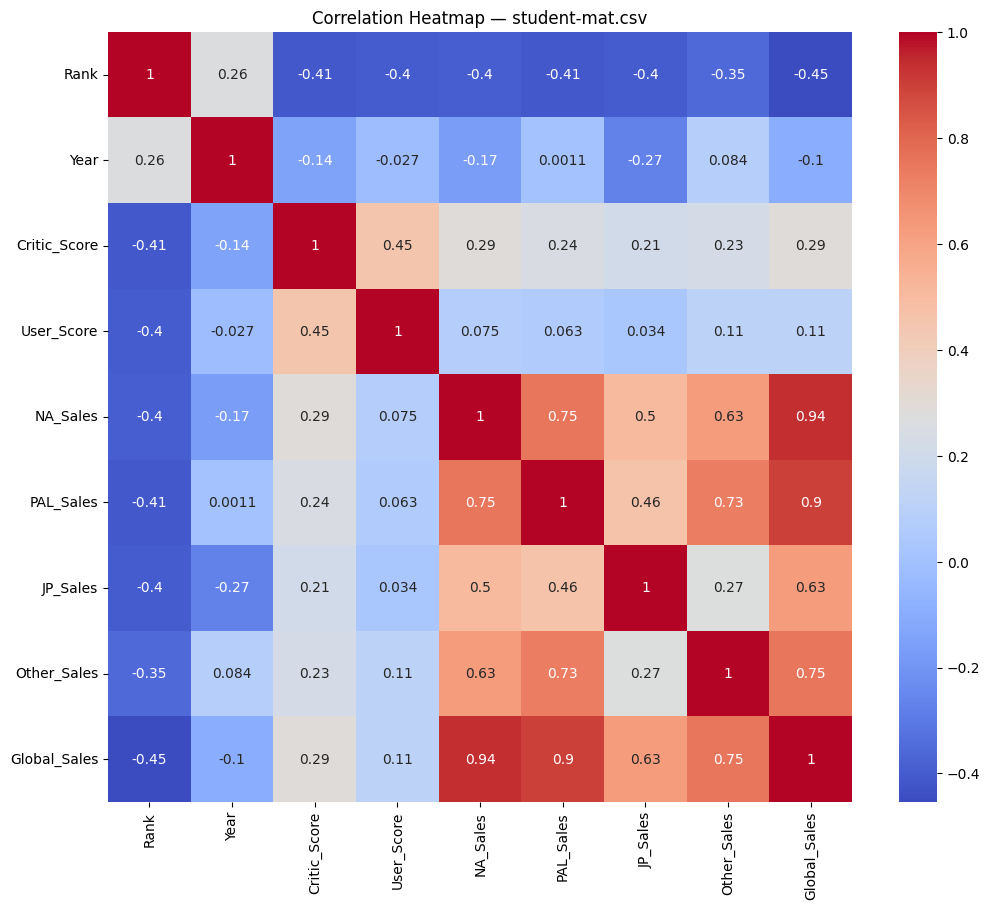

In [182]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[numeric].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — student-mat.csv")
plt.savefig('MaxShuford_Corr_VideoGameSales.png')
plt.show()


# Here we can see a correlation matrix that shows the links between all our numeric attributes

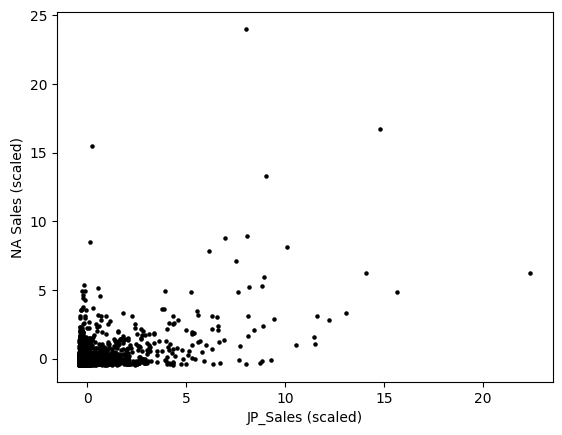

In [157]:
X = df_clean[['JP_Sales', 'NA_Sales']]

scaled = StandardScaler().fit_transform(X)

plt.scatter(scaled[:,0], scaled[:,1], c='black', s=5)
plt.xlabel("JP_Sales (scaled)")
plt.ylabel("NA Sales (scaled)")
plt.show()

### Lets scale logarithmically, that way we can see meaningful clusters 

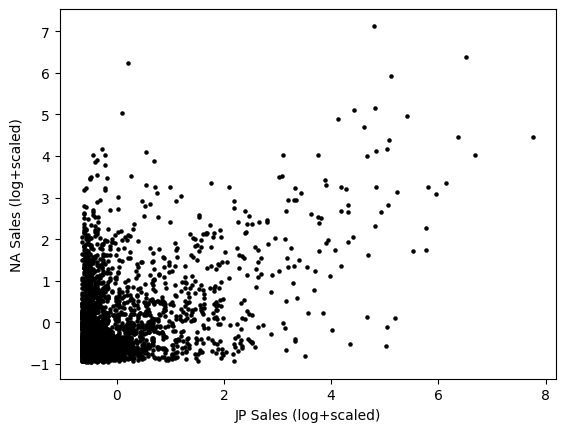

In [158]:
df_log = df_clean.copy()
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_log = df[features].dropna()
df_log['JP_log'] = np.log1p(df_log['JP_Sales'])
df_log['NA_log'] = np.log1p(df_log['NA_Sales'])

X = df_log[['JP_log', 'NA_log']]
scaled = StandardScaler().fit_transform(X)

plt.scatter(scaled[:,0], scaled[:,1], s=5, c='black')
plt.xlabel("JP Sales (log+scaled)")
plt.ylabel("NA Sales (log+scaled)")
plt.show()

## Lets find our optimal K-value

In [159]:
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_cluster = df[features].dropna()

for k in range(2, 11):   # silhouette needs at least k=2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    print(f"k={k}, silhouette score={score}")

k=2, silhouette score=0.6381764394489753
k=3, silhouette score=0.533603093915034
k=4, silhouette score=0.5624711787495446
k=5, silhouette score=0.4815768609573793
k=6, silhouette score=0.4898854048396182
k=7, silhouette score=0.45791728855708413
k=8, silhouette score=0.4530788448462291
k=9, silhouette score=0.4446052247780819
k=10, silhouette score=0.41443659566492813


In [160]:
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_cluster = df[features].dropna()

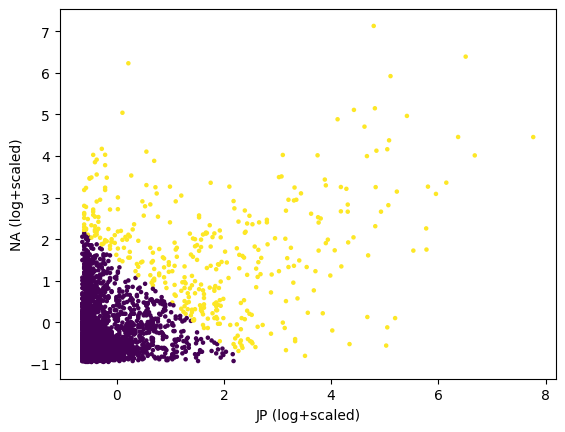

In [162]:
df_cluster['JP_log'] = np.log1p(df_cluster['JP_Sales'])
df_cluster['NA_log'] = np.log1p(df_cluster['NA_Sales'])

X = df_cluster[['JP_log', 'NA_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("JP (log+scaled)")
plt.ylabel("NA (log+scaled)")
plt.savefig('JPvsNA_Sales_KMEANS.png')
plt.show()

In [163]:
features = ['PAL_Sales', 'NA_Sales']
df_cluster = df[features].dropna()

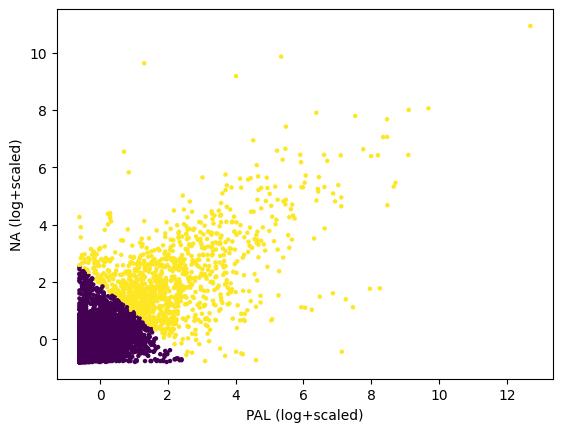

In [164]:
df_cluster['PAL_log'] = np.log1p(df_cluster['PAL_Sales'])
df_cluster['NA_log'] = np.log1p(df_cluster['NA_Sales'])

X = df_cluster[['PAL_log', 'NA_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("PAL (log+scaled)")
plt.ylabel("NA (log+scaled)")
plt.savefig('PALvsNA_Sales_KMEANS.png')
plt.show()

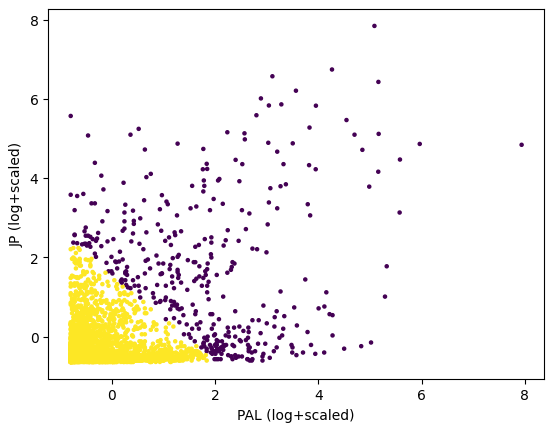

In [181]:
features = ['PAL_Sales', 'JP_Sales']
df_cluster = df[features].dropna()

df_cluster['PAL_log'] = np.log1p(df_cluster['PAL_Sales'])
df_cluster['JP_log'] = np.log1p(df_cluster['JP_Sales'])

X = df_cluster[['PAL_log', 'JP_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("PAL (log+scaled)")
plt.ylabel("JP (log+scaled)")
plt.savefig('JPvsPAL_Sales_KMEANS.png')
plt.show()

## 1. Purpose

The purpose of this question was to see if we can see any grouping of sales between Japan, European, and American games sales. The purpose of these groupings was to identify the bulk games vs the outlier games and the trends between regions.

# 2. Methodology

To analyze patterns in video game performance, I began by cleaning the dataset and removing entries with missing values in the sales columns used for clustering. Since raw sales data are heavily skewed and contain extreme outliers, I applied a log transformation followed by standardization to normalize the distribution of each feature. I selected JP_Sales and NA_Sales as the primary attributes for clustering, as these regions exhibit distinct market behaviors and provide useful insight into regional demand patterns. After preprocessing, I used the K-Means algorithm and evaluated different values of k using the silhouette score to determine the optimal number of clusters. The highest silhouette score was achieved at k = 2, indicating that the dataset naturally separates into two well-defined groups. This preprocessing and evaluation pipeline allowed me to create meaningful and interpretable clusters that reflect real differences in regional game sales performance.

# 3. Results

I performed K-Means clustering using two sales regions at a time. The scatterplots of PAL vs. JP Sales, PAL vs. NA Sales, and JP vs. NA Sales all produced a consistent clustering structure, where the algorithm identified two distinct groups of video games. Across all three visualizations, the first cluster represents the large majority of titles that sell at relatively low levels across each region. The second cluster contains a much smaller subset of high-performing titles that achieve significantly stronger sales, forming a clear separation even after log scaling. This pattern suggests that sales behavior is dominated by a small number of blockbuster games that perform well across multiple regions, while the majority of games sell modestly. The consistent separation across different regional pairings reinforces that k = 2 is the most meaningful and stable number of clusters for this dataset. Overall, the clustering results effectively highlight the divide between globally successful titles and the broader market of lower-selling games.

# 4. Highlights

the K-Means algorithm consistently separated the dataset into two dominant groups. The first cluster contains the overwhelming majority of titles, characterized by low to moderate sales in each region, reflecting the typical performance of most games released on the market. In contrast, the second cluster isolates a much smaller subset of high-performing, top-selling games that achieve significantly stronger sales across multiple regions. This divide highlights the highly skewed nature of the video game industry, where only a limited number of blockbuster franchises generate large international sales while most titles remain regionally limited or modest in performance.

# Can we predict a games Global Sales based on its Regional sales

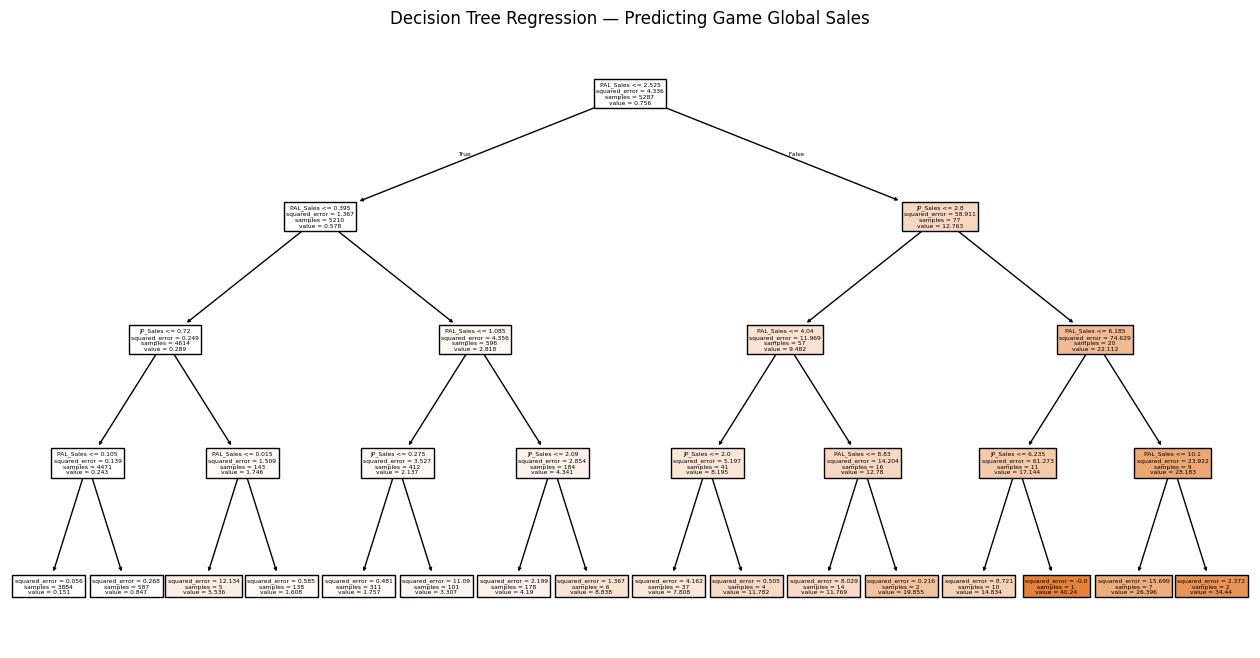

In [166]:
X = df_clean[features]
y = df_clean['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=features, filled=True)
plt.title("Decision Tree Regression — Predicting Game Global Sales")
plt.savefig('Decision Tree Regression — Predicting Game Global Sales.png')
plt.show()

### Lets classify our data, and fit our sales data into High medium and low tiers

In [173]:
features = ['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales']
df_model = df_clean[features + ['Global_Sales']].dropna()
X_log = np.log1p(df_model[features])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

df_model['Sales_Tier'] = pd.qcut(df_model['Global_Sales'],q=3,labels=['Low', 'Medium', 'High'])

y_class = df_model['Sales_Tier']
y_reg = df_model['Global_Sales']

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(X_scaled, y_class, y_reg, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_class_train)

tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, y_reg_train)

tier_pred = nb.predict(X_test)
sales_pred = tree.predict(X_test)

In [168]:
results = pd.DataFrame({'Actual_Global_Sales': y_reg_test,'Predicted_Global_Sales': sales_pred,'Actual_Tier': y_class_test,'Predicted_Tier': tier_pred})

In [169]:
results

,Actual_Global_Sales,Predicted_Global_Sales,Actual_Tier,Predicted_Tier
1520,2.41,1.501159,High,High
3157,1.08,0.928824,Medium,Medium
4799,0.64,1.501159,Medium,Medium
4423,0.72,0.360000,Medium,Medium
13626,0.21,0.360000,Low,Low
...,...,...,...,...
6827,0.39,0.360000,Low,Low
1888,1.95,1.501159,High,High
2082,1.86,1.501159,High,Medium
6444,0.43,0.360000,Low,Low


[[252   0  45]
 [  0 270  24]
 [  7  17 269]]


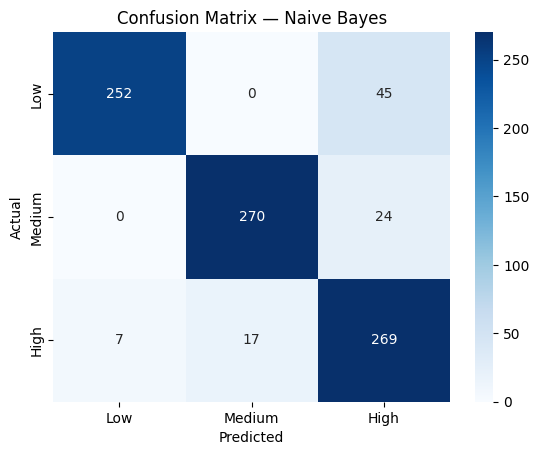

In [172]:
cm = confusion_matrix(y_class_test, tier_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Naive Bayes")
plt.savefig('CM_Naive_Bayes_Global_Sales.png')
plt.show()

In [171]:
print(classification_report(y_class_test, tier_pred))

              precision    recall  f1-score   support

        High       0.97      0.85      0.91       297
         Low       0.94      0.92      0.93       294
      Medium       0.80      0.92      0.85       293

    accuracy                           0.89       884
   macro avg       0.90      0.89      0.90       884
weighted avg       0.90      0.89      0.90       884



# 1. Purpose

The purpose of this analysis is to evaluate whether regional video game sales can be used to predict a game’s overall commercial performance. Specifically, the study investigates two related questions: 
> (1) whether regional sales can accurately estimate a game’s global sales total, and 
>> (2) whether a game can be classified into a sales performance tier—low, medium, or high—based on its sales in North America, Europe, Japan

# 2. Methodology

For regression analysis, a Decision Tree Regressor was trained using regional sales as predictors and global sales as the target variable, with a train–test split of 70/30. This model provides an interpretable structure that highlights which regions contribute most to predicting worldwide sales totals. To support a classification task, the continuous global sales variable was discretized into three equally sized tiers—Low, Medium, and High sellers—using quantile binning. A Gaussian Naive Bayes classifier was then trained to predict these tiers from the same regional sales inputs. Finally, both models were combined into a unified framework in which Naive Bayes provides a categorical sales tier prediction, and the Decision Tree provides a numerical global sales estimate.

# 3. Results

The Decision Tree Regressor trained on log-transformed regional sales achieved meaningful predictive structure, revealing that PAL and JP sales were the strongest determinants of global sales. The regression tree produced interpretable sales partitions, with predicted global sales ranging from under one million units for low-performing titles to over twenty million units for top-selling games.

For the classification task, the Naive Bayes model demonstrated high accuracy in predicting whether a game fell into the Low, Medium, or High global sales tier. The classifier achieved an overall accuracy of 89%, with especially strong precision for the High-selling tier (0.97) and Low-selling tier (0.94). The Medium category showed slightly lower precision (0.80), reflecting a greater overlap in regional sales patterns for mid-range titles. The confusion matrix further confirmed that most misclassifications occurred between Medium and High sellers, while Low sellers were consistently well-identified.

Taken together, the models show that regional sales provide both a reliable numerical estimate of global performance and a strong categorical signal that supports effective classification.

# 4. Harvest Highlights

Titles with strong PAL and JP sales were consistently associated with high global totals, as reflected in the structure of the Decision Tree Regressor. Second, the Naive Bayes classifier revealed that global sales naturally fall into three distinct tiers, and that these tiers are highly predictable from regional performance alone. The consistency of the results across both the regression and classification tasks highlights a clear pattern, regional markets are not isolated but instead act as strong predictors of worldwide performance. The analysis reinforces the idea that commercial success in one region often correlates with broader international appeal.

# What do the trends in game sales each year based on global sales show?

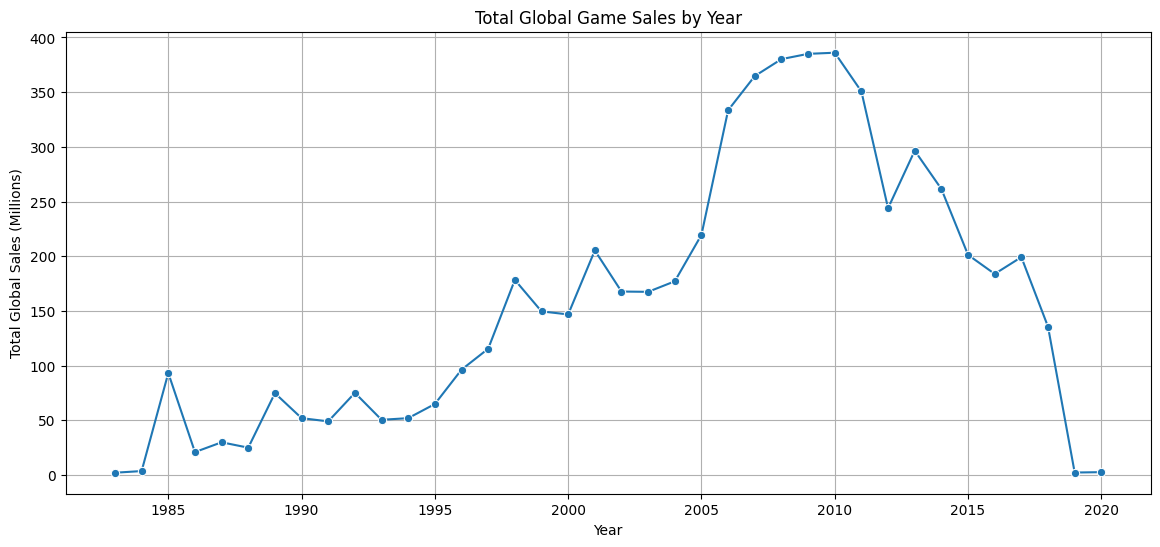

In [178]:
df_year = df_clean[['Year', 'Global_Sales']].dropna()

# Convert Year to int
df_year['Year'] = df_year['Year'].astype(int)

# Aggregate metrics
sales_by_year = df_year.groupby('Year')['Global_Sales'].sum()
avg_sales_by_year = df_year.groupby('Year')['Global_Sales'].mean()
games_per_year = df_year.groupby('Year').size()

# Graph!

plt.figure(figsize=(14,6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o')
plt.title("Total Global Game Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Global Sales (Millions)")
plt.grid(True)
plt.savefig('TotalGameSales.png')
plt.show()

### Average game sales per game per year

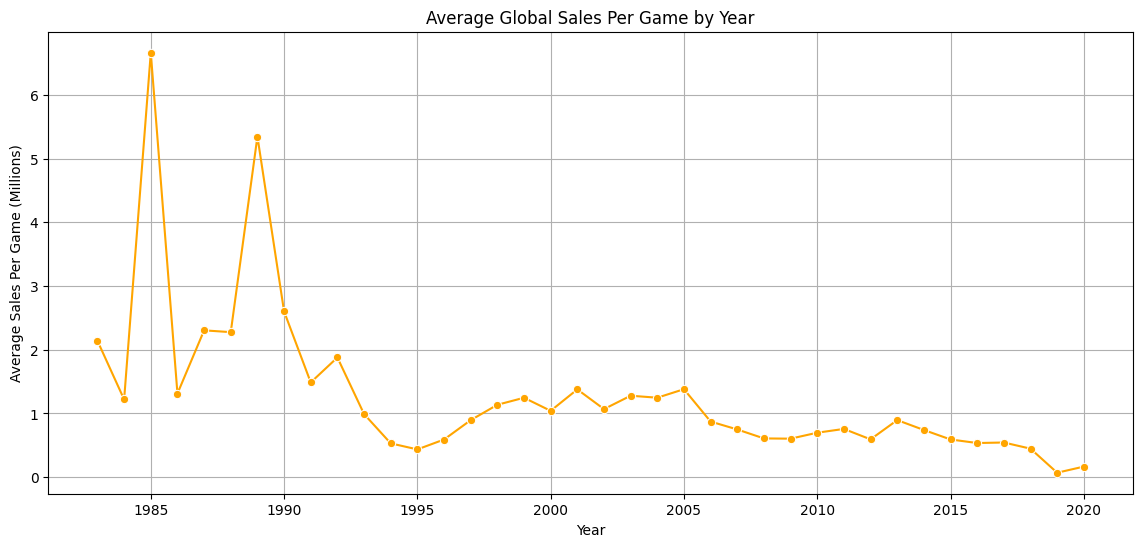

In [179]:

plt.figure(figsize=(14,6))
sns.lineplot(x=avg_sales_by_year.index, y=avg_sales_by_year.values, marker='o', color='orange')
plt.title("Average Global Sales Per Game by Year")
plt.xlabel("Year")
plt.ylabel("Average Sales Per Game (Millions)")
plt.grid(True)
plt.savefig('AverageGameSalesPerYear')
plt.show()

### Number of Games released by year

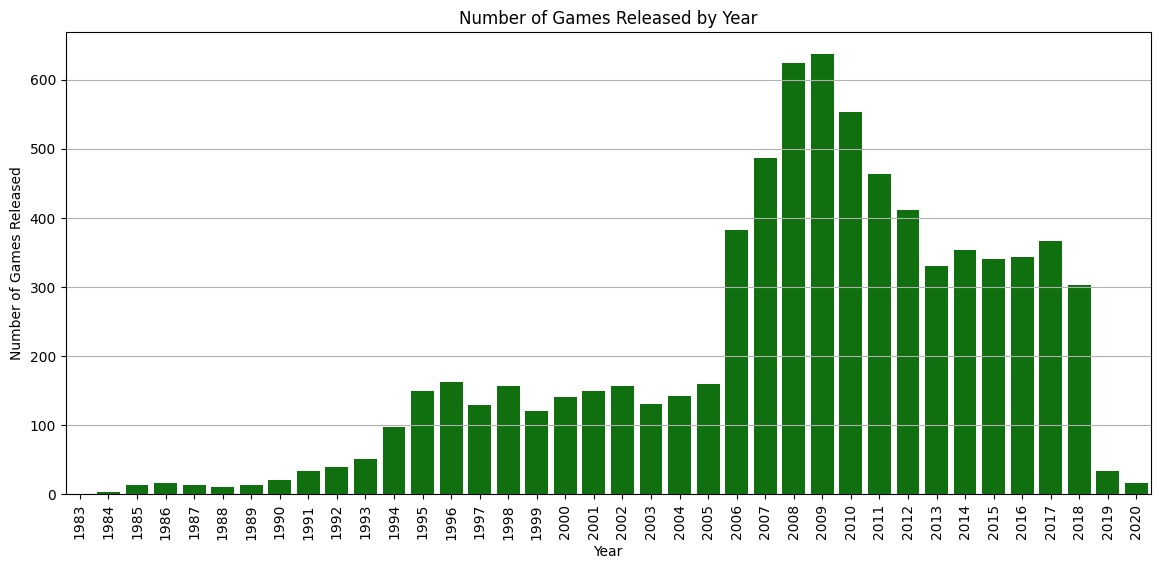

In [180]:
plt.figure(figsize=(14,6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, color='green')
plt.title("Number of Games Released by Year")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.savefig('NumberOfGamesReleased')
plt.show()

# 1. Purpose

The purpose of this analysis is to examine how global video game sales have changed over time and to identify meaningful trends in yearly performance. By aggregating total global sales, average sales per game, and the number of games released each year, the goal is to determine how the video game market has evolved and to understand major shifts in consumer demand, industry growth, and market saturation.

# 2. Methodology

The dataset was filtered to include only entries with valid year and global sales values. The analysis begins by grouping the data by release year and computing three key metrics: 

(1) total global sales per year 

(2) average global sales per game

(3) the number of games released each year

These metrics were visualized using line plots and bar charts to identify macro-level trends across multiple decades of video game history. Line plots were used to represent total and average sales trends, while a bar chart was used to show yearly game release counts.

# 3. Results

Total global sales show a strong upward trajectory from the early 2000s through approximately 2008–2009, marking a period of rapid industry growth driven by major console platforms and high-volume franchises. After peaking around 2008, total sales begin a steady decline. This trend could be seen because of a slow move towards digital sales over physical sales or even mobile gaming.

Average global sales per game follow a similar pattern, peaking in the late 2000s before dropping off in later years. This decline is partially explained by the increasing number of games released per year, which surged during the mid-to-late 2000s and resulted in greater market saturation.

In the 2010s, both total and average sales stabilize, with occasional spikes corresponding to hits. These spikes indicate that the market became increasingly dependent on a smaller number of high-performing titles, while the majority of games sold at more modest levels.

# 4. Harvest Highlights

The analysis of yearly global sales shows several important patterns. Global video game sales increased steadily in the early and mid-2000s and reached their highest point around 2008 and 2009. After that peak, sales began to decline as the industry shifted away from physical game sales and toward digital downloads and online platforms.

The number of games released each year also grew during the mid-2000s, which helped explain why the average sales per game started to drop. As more games entered the market, individual titles sold fewer copies on average. In the later years, global sales became more stable, but large spikes still appeared when major blockbuster games were released.

Overall, the results show that the video game industry moved from a period of rapid growth to a more crowded and competitive market, and eventually toward a system that depends heavily on a few extremely successful titles. This helps explain how both industry trends and consumer behavior have changed over time.